## JURNAL MODUL 3 F1D022108

In [146]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Langkah pertama yang harus dilakukan adalah import library. Library yang di butuhkan ada OpenCV, Matplotlib, dan NumPy. kombinasi tersebut sering digunakan bersamaan untuk tugas-tugas yang melibatkan pengolahan citra dan visualisasi data.

In [147]:
image = cv2.imread("loriYagami.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imread digunakan untuk membaca citra yang akan di tampilkan dalam program. cv2.IMREAD_GRAYSCALE digunakan untuk menentukan bahwa gambar harus diubah menjadi skala keabuan saat pembacaan. 

plt.imshow(image, cmap='gray') menggunakan Matplotlib, khususnya sub-modul pyplot yang diimpor dengan plt, ini digunakan untuk menampilkan gambar yang telah dimuat sebelumnya dalam format skala keabuan. Fungsi imshow adalah metode yang sering digunakan untuk memvisualisasikan gambar 2D dalam array. 

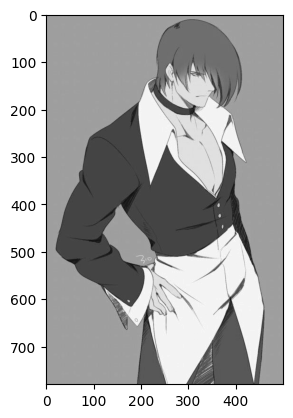

In [148]:
plt.imshow(image,cmap='gray')

In [149]:
low_pass_filter = np.array([0.7, 0.7])
high_pass_filter = np.array([-0.7, 0.7])

code tersebut mendefinisikan kernel yang digunakan, di mana kernel yang akan di gunakan adalah pada LPF dengan rentang (0.7, 0.7) dan pada HPF dengan rentang (-0.7, 0.7)

## DEKOMPOSISI

In [150]:
def row_padding(img, n):
    n = len(n) - 1
    result = np.pad(img, [(0, 0), (0, n)])
    return result

Fungsi row_padding dalam kode digunakan untuk menambahkan padding horizontal (padding di sisi kanan) pada gambar yang diberikan. "np.pad" digunakan untuk melakukan penambahan padding tersebut, dengan spesifikasi tidak ada padding pada sumbu vertikal dan padding sebesar n pada sumbu horizontal kanan.

In [151]:
def column_padding(img, n):
    n = len(n) - 1
    result = np.pad(img, [(0, n), (0, 0)])
    return result

Fungsi column_padding digunakan untuk menambahkan padding vertikal (padding di bagian bawah) pada gambar yang diberikan. 

In [152]:
def row_convolution(pad, kernel, img):
    result = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(len(kernel)):
                result[i][j] += (kernel[k] * pad[i, j + k])
    return result

Fungsi row_convolution dirancang untuk melakukan operasi konvolusi pada baris dari sebuah gambar dengan menggunakan sebuah kernel. Fungsi ini menerima tiga argumen: pad, yang merupakan gambar yang telah ditambahkan padding; kernel, yang merupakan array satu dimensi berisi bobot-bobot untuk konvolusi; dan img, gambar asli yang digunakan untuk menentukan dimensi matriks hasil.

In [153]:
def column_convolution(pad, kernel, img):
    result = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(len(kernel)):
                result[i][j] += (kernel[k] * pad[i + k, j])
    return result

Fungsi column_convolution dirancang untuk melaksanakan operasi konvolusi pada kolom dari sebuah gambar dengan menggunakan kernel yang diberikan. Mirip dengan konvolusi pada baris, fungsi ini menerima tiga parameter: pad, yang adalah gambar dengan padding tambahan; kernel, sebuah array satu dimensi berisi bobot untuk konvolusi; dan img, gambar asli yang digunakan untuk menentukan ukuran matriks hasil.

In [154]:
def row_DownSampling(array):
    brs = int(array.shape[0] / 2)
    klm = int(array.shape[1])
    result = np.zeros((brs, klm))
    index = 0
    for i in range(brs):
        for j in range(klm):
            result[i][j] = array[index][j]
        index += 2
    return result

Fungsi row_DownSampling adalah untuk melakukan downsampling pada gambar atau array dua dimensi dengan mengurangi jumlah barisnya menjadi setengah. Fungsi ini melakukan ini dengan memilih setiap baris kedua dari array masukan.

In [155]:
def column_DownSampling(array):
    brs = int(array.shape[0])
    klm = int(array.shape[1] / 2)
    result = np.zeros((brs, klm))
    for i in range(brs):
        index = 0
        for j in range(klm):
            result[i][j] = array[i][index]
            index += 2
    return result

Fungsi column_DownSampling yang diberikan bertujuan untuk melakukan downsampling pada gambar atau array dua dimensi dengan mengurangi jumlah kolomnya sebanyak setengah. Fungsi ini mengambil satu parameter, yaitu array, yang merupakan array dua dimensi yang ingin di-downsample.

In [156]:
def decompose(citra, lowPass, highPass):
    Pad1 = row_padding(citra, lowPass)
    Konvolusi1 = row_convolution(Pad1, lowPass, citra)
    DownSampling1 = column_DownSampling(Konvolusi1)
    Pad2 = column_padding(DownSampling1, highPass)
    Konvolusi2 = column_convolution(Pad2, highPass, DownSampling1)
    DownSampling2 = row_DownSampling(Konvolusi2)
    Result = DownSampling2
    return Result

Fungsi decompose merupakan implementasi dari suatu proses pemrosesan gambar yang bertujuan untuk menguraikan citra menjadi komponen-komponen yang lebih sederhana melalui serangkaian langkah yang melibatkan konvolusi, padding, dan downsampling. 
Row Padding: Fungsi row_padding menambahkan padding horizontal pada citra input menggunakan filter lowPass untuk mempersiapkan citra untuk konvolusi pada langkah berikutnya. 
Row Convolution: Citra yang telah dipadding diolah melalui row_convolution dengan kernel lowPass, menghasilkan citra yang memiliki detail frekuensi rendah karena kernel low-pass menekankan area-area gambar dengan perubahan intensitas yang lambat.
Column DownSampling: Hasil dari konvolusi kemudian di-downsample secara vertikal oleh column_DownSampling, mengurangi resolusi vertikal citra dengan memilih setiap baris kedua.

In [157]:
def normalize_image(img):
    min_val = np.min(img)
    max_val = np.max(img)
    normalized_img = ((img - min_val) / (max_val - min_val)) * 255
    return normalized_img.astype(np.uint8)

Fungsi normalize_image bertujuan untuk menormalisasi intensitas piksel dalam gambar (yang diwakili sebagai array NumPy) ke rentang 0 hingga 255, yang umum digunakan dalam format gambar 8-bit. Proses normalisasi ini penting untuk menyelaraskan berbagai gambar yang memiliki rentang nilai berbeda ke skala yang sama, yang berguna terutama dalam pemrosesan gambar dan analisis visual.

In [158]:
# memasukkan jumlah level dekomposisi
num_levels = 6 

code ini menunjukkan bahwa ada enam level dekomposisi yang direncanakan dalam sebuah algoritma. 

INISIALISASI STRUKTUR DATA
Mendeklarasikan list untuk menyimpan hasil dari setiap tingkat dekomposisi (LowLow_levels, LowHigh_levels, HighLow_levels, HighHigh_levels) dan gambar yang menggabungkan hasil tersebut (combined_levels).
PROSES DEKOMPOSISI MULTI-LV
Melakukan loop sejumlah num_levels kali, dimana pada setiap iterasi, gambar asli atau hasil dari iterasi sebelumnya diuraikan menjadi empat komponen menggunakan kombinasi filter low_pass dan high_pass. Setiap hasil disimpan ke list yang sesuai setelah dinormalisasi untuk memastikan konsistensi dalam pemrosesan selanjutnya.
PENGGABUNGAN HASIL DEKOMPOSISI
Setelah mendapatkan empat komponen dari dekomposisi, kode menggabungkan semua komponen menjadi satu gambar menggunakan np.vstack dan np.hstack untuk menampilkan hasil sejajar, yang berguna untuk visualisasi dan analisis.
VISUALISASI
Menampilkan hasil dari setiap tingkat dekomposisi dalam sebuah plot menggunakan Matplotlib. Setiap baris pada plot menunjukkan satu level dekomposisi dengan sub-plot untuk LowLow, LowHigh, HighLow, HighHigh, dan gambar gabungan.
PERULANGAN GAMBAR
Menggunakan LowLow dari setiap tingkat dekomposisi sebagai input untuk tingkat selanjutnya, yang memungkinkan dekomposisi berurutan dari informasi gambar pada skala yang semakin halus.

Proses dekomposisi level 1...
Proses dekomposisi level 2...
Proses dekomposisi level 3...
Proses dekomposisi level 4...
Proses dekomposisi level 5...
Proses dekomposisi level 6...


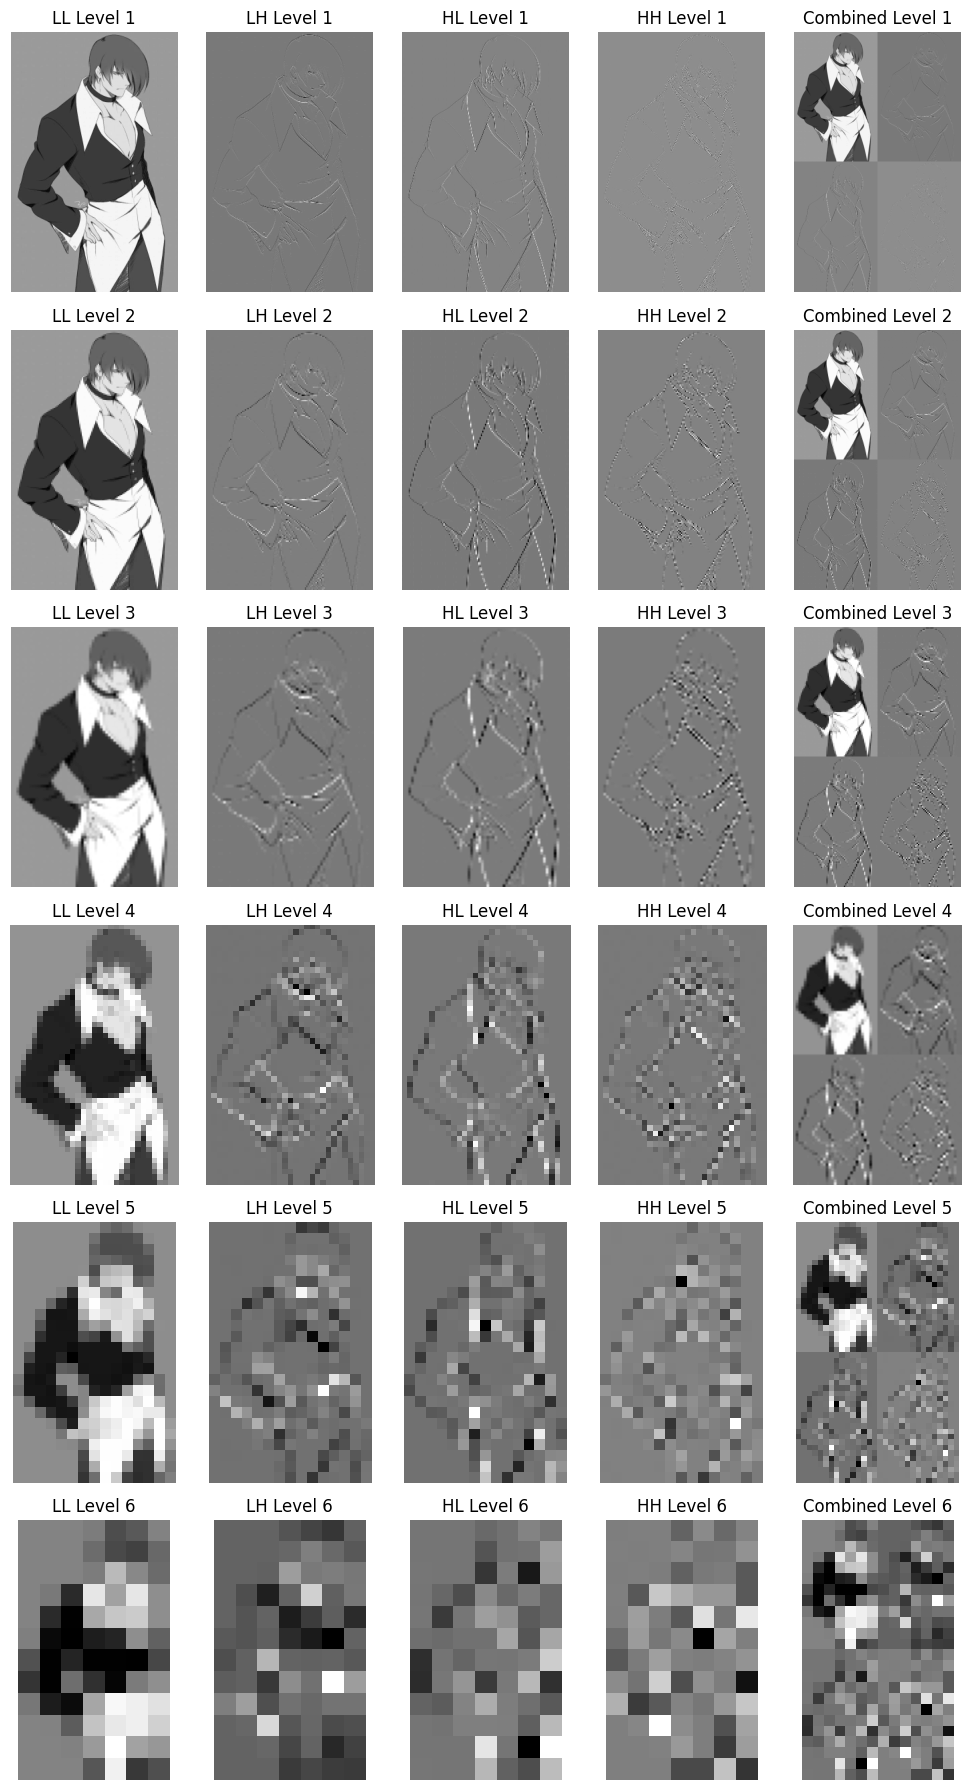

Multi-level dekomposisi dan penggabungan selesai.


In [159]:
# jumlah filter level dengan menginisialisasi struktur data
LowLow_levels = []
LowHigh_levels = []
HighLow_levels = []
HighHigh_levels = []
combined_levels = []

current_image = image
for level in range(1, num_levels + 1):
    print(f"Proses dekomposisi level {level}...")
    
    # dekomposisi level - level
    LowLow = dekomposisi(current_image, low_pass_filter, low_pass_filter)
    LowHigh = dekomposisi(current_image, low_pass_filter, high_pass_filter)
    HighLow = dekomposisi(current_image, high_pass_filter, low_pass_filter)
    HighHigh = dekomposisi(current_image, high_pass_filter, high_pass_filter)
    
    # Menormalkan setiap komponen dan simpan dalam daftar masing-masing
    LowLow_levels.append(normalize_image(LowLow))
    LowHigh_levels.append(normalize_image(LowHigh))
    HighLow_levels.append(normalize_image(HighLow))
    HighHigh_levels.append(normalize_image(HighHigh))
    
    # menggabungkan LL dengan LH, HL, HH dari level yang sesuai
    combined_img = np.vstack((
        np.hstack((LowLow_levels[-1], LowHigh_levels[-1])),
        np.hstack((HighLow_levels[-1], HighHigh_levels[-1]))
    ))
    combined_levels.append(normalize_image(combined_img))
    
    # perbarui gambar saat ini untuk dekomposisi tingkat berikutnya
    current_image = LowLow  # gunakan LL sebagai input untuk tingkat berikutnya

# menampilkan LL, LH, HL, HH, dan gambar gabungan untuk setiap level
fig, axes = plt.subplots(num_levels, 5, figsize=(10, 3*num_levels))

for level in range(num_levels):
    axes[level, 0].imshow(LowLow_levels[level], cmap='gray')
    axes[level, 0].set_title(f"LL Level {level+1}")
    axes[level, 0].axis('off')
    
    axes[level, 1].imshow(LowHigh_levels[level], cmap='gray')
    axes[level, 1].set_title(f"LH Level {level+1}")
    axes[level, 1].axis('off')
    
    axes[level, 2].imshow(HighLow_levels[level], cmap='gray')
    axes[level, 2].set_title(f"HL Level {level+1}")
    axes[level, 2].axis('off')
    
    axes[level, 3].imshow(HighHigh_levels[level], cmap='gray')
    axes[level, 3].set_title(f"HH Level {level+1}")
    axes[level, 3].axis('off')
    
    axes[level, 4].imshow(combined_levels[level], cmap='gray')
    axes[level, 4].set_title(f"Combined Level {level+1}")
    axes[level, 4].axis('off')

plt.tight_layout()
plt.show()

print("Multi-level dekomposisi dan penggabungan selesai.")

## PENGGABUNGAN SELURUH LEVEL 

INISIALISASI LIST combined_levels
Daftar ini akan menyimpan citra yang telah digabungkan dari semua level.
LOOP UTAMA
Melakukan iterasi untuk setiap level dekomposisi (num_levels). combined_img diinisiasi dengan citra LowLow dari level saat ini.
LOOP NESTED untuk RESIZE dan PENGGABUNGAN
Untuk setiap level setelah level saat ini, fungsi melakukan resize pada citra LowHigh, HighLow, dan HighHigh ke ukuran combined_img untuk memastikan semua citra yang akan digabung memiliki dimensi yang sama.
Kemudian menggabungkan citra tersebut menggunakan np.vstack dan np.hstack. np.vstack digunakan untuk menumpuk citra secara vertikal, sementara np.hstack digunakan untuk menumpuk citra secara horizontal, menciptakan layout dua-dimensi dari citra yang berbeda.
NORMALISASI DAN PENYIMPANAN
Setelah citra-citra dari semua level relevan digabung, hasilnya dinormalisasi menggunakan fungsi normalize_image dan disimpan dalam list combined_levels.
VISUALISASI HASIL
Fungsi visualisasi menggunakan Matplotlib untuk menampilkan citra hasil penggabungan dari level tertentu (dalam contoh ini, level kedua). Citra ditampilkan dalam skala keabuan.

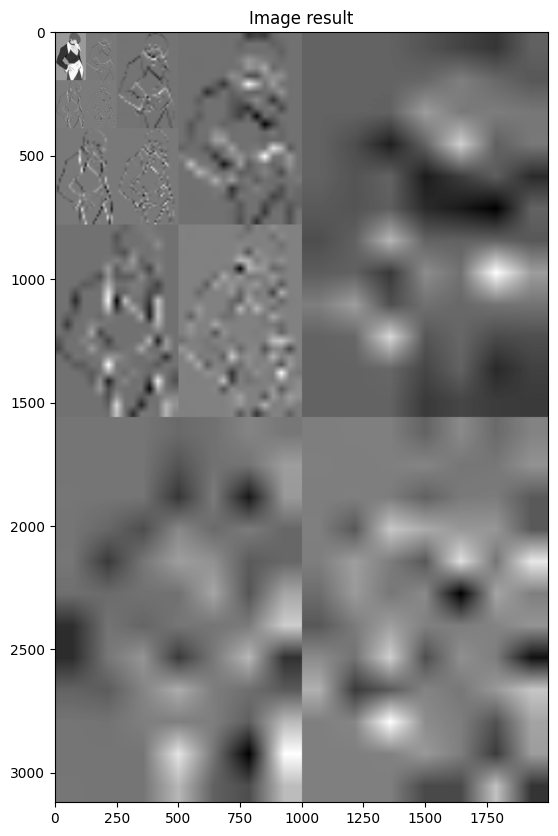

In [160]:
combined_levels = []
for level in range(1, num_levels + 1):
    combined_img = LowLow_levels[level - 1]
    for i in range(level, num_levels):
        # Resize gambar pada setiap level
        LowHigh_resized = cv2.resize(LowHigh_levels[i], (combined_img.shape[1], combined_img.shape[0]))
        HighLow_resized = cv2.resize(HighLow_levels[i], (combined_img.shape[1], combined_img.shape[0]))
        HighHigh_resized = cv2.resize(HighHigh_levels[i], (combined_img.shape[1], combined_img.shape[0]))
        
        # Menggabungkan gambar secara hierarkis
        combined_img = np.vstack((
            np.hstack((combined_img, LowHigh_resized)),
            np.hstack((HighLow_resized, HighHigh_resized))
        ))
    combined_levels.append(normalize_image(combined_img))

plt.figure(figsize=(10, 10))
plt.imshow(combined_levels[1], cmap='gray')
plt.title("Image result")
plt.show()

## REKONTRUKSI

INISIALISASI MATRIKS
Fungsi mulai dengan menentukan dimensi gambar yang akan direkonstruksi berdasarkan ukuran dari komponen LL. Ukuran citra yang direkonstruksi adalah dua kali dari komponen LL karena proses dekomposisi sebelumnya membagi citra menjadi empat (LL, LH, HL, HH).
REKONTRUKSI POSISI PIKSEL
Setiap piksel dari LL, LH, HL, HH diletakkan kembali ke posisi awalnya dalam gambar yang lebih besar (LL1, LH1, HL1, HH1), dengan menggunakan teknik penyisipan, meninggalkan piksel yang lain kosong (dengan nilai 0).
INTERPOLAR BARIS
Menginterpolasi nilai-nilai untuk baris yang kosong menggunakan nilai dari baris terakhir dan komponen LH.
INTERPOLAR KOLOM
Menginterpolasi nilai-nilai untuk kolom yang kosong menggunakan nilai dari kolom terakhir dan komponen HL.
PENJUMLAHAN AKHIR
Citra direkonstruksi dengan menjumlahkan hasil dari semua komponen (LL1, LH1, HL1, HH1).

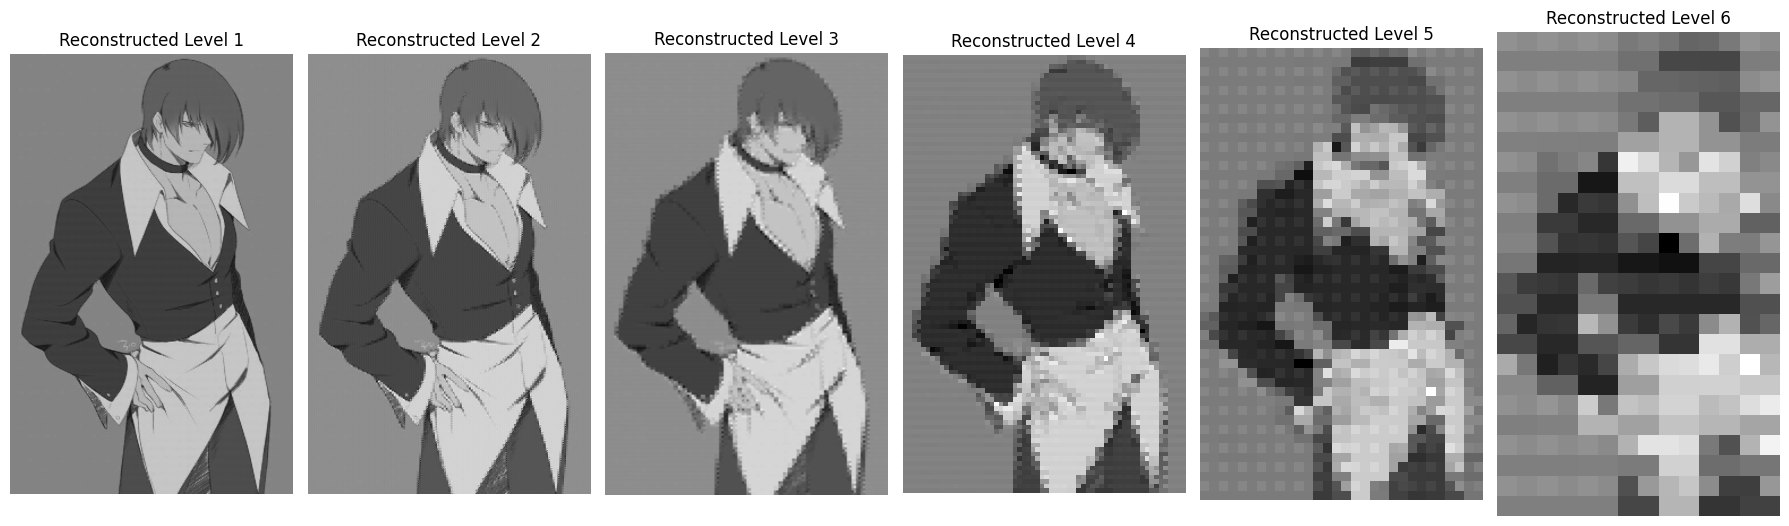

Multi-level rekontruksi lengkap.


In [161]:
def rekonstruksi(LL, LH, HL, HH):
    height_img, width_img = LL.shape
    h = height_img * 2
    w = width_img * 2 
    image = np.zeros([h, w]) 
    LL1, LH1 = np.zeros([h, w]), np.zeros([h, w]) 
    HL1, HH1 = np.zeros([h, w]), np.zeros([h, w]) 
    
    # Rekonstruksi dari level tertinggi ke level terendah
    for i in range(h // 2):
        for j in range(w // 2):
            LL1[2*i][2*j] = LL[i][j]
            LH1[2*i][2*j] = LH[i][j]
            HL1[2*i][2*j] = HL[i][j]
            HH1[2*i][2*j] = HH[i][j]
    
    for i in range(1,h, 2):
        for j in range(w):
            LL1[i][j] = LL1[i-1][j] + LH1[i-1][j]
    
    for i in range(h):
        for j in range(1, w, 2):
            LL1[i][j] = LL1[i][j-1] + HL1[i][j-1]
    
    for i in range(h):
        for j in range(w):
            image[i][j] = LL1[i][j] + HH1[i][j]
    
    return image

# Rekonstruksi dari level terendah ke level tertinggi
reconstructed_images = []
for i in range(num_levels):
    reconstructed_image = rekonstruksi(LL_levels[i], LH_levels[i], HL_levels[i], HH_levels[i])
    reconstructed_images.append(normalize_image(reconstructed_image))

# menampilkan hasil gambar rekonstruksi
fig, axes = plt.subplots(1, num_levels, figsize=(3*num_levels, 10))
for i in range(num_levels):
    axes[i].imshow(reconstructed_images[i], cmap='gray')
    axes[i].set_title(f"Reconstructed Level {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print("Multi-level rekontruksi lengkap.")